In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
seed(1337)
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import layers, models, Model, optimizers
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, plot_confusion_matrix



In [ ]:
#Welcome to Binary Classification Model for Curacel Recruitment Process
#Done By Adesoji Alu
# I AM AN ML Engineer.

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Number of training images per category')

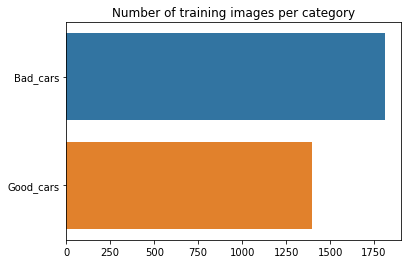

In [2]:
#This is the route for accepting the directory of the  location of the image path 
train_dir= '/home/adesoji/Downloads/Vehicle_Classification_Model_Images/Train'
val_dir = "/home/adesoji/Downloads/Vehicle_Classification_Model_Images/validation"
category_names = sorted(os.listdir("/home/adesoji/Downloads/Vehicle_Classification_Model_Images/Train"))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/home/adesoji/Downloads/Vehicle_Classification_Model_Images/Train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
    
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category")

In [3]:
category_names

['Bad_cars', 'Good_cars']

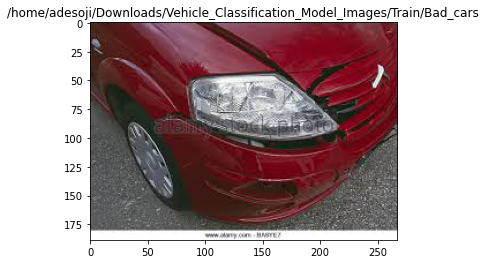

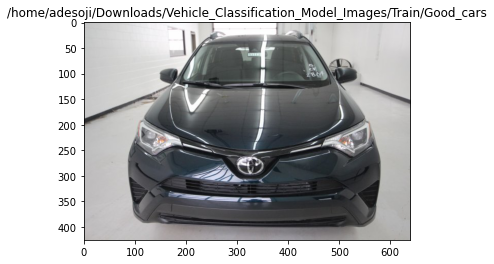

In [3]:
for subdir, dirs, files in os.walk('/home/adesoji/Downloads/Vehicle_Classification_Model_Images/Train'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models #this is for model cloning and ApI entries
from tensorflow.keras import optimizers #Built In optimizer class

#Introducing a pretrained model called imagenet. This is called transfer learning . for example, Obama is small in stature and he can't see ahead of 20 Km, Now, Dwayne johnson called the rock comes along to carry Obama
#on his shoulder  in order for him to transfer is ability to see further to obama and that is what is called transfer learning.
conv_base = vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


/home/adesoji/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [4]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
#This takes the path to a directory and generates batches of augmented data. the augmentation helps in regularization . Also it creates more dataset to improve the performance of deep learning neural networks
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=16,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=16,
    class_mode='binary')

Found 3204 images belonging to 2 classes.
Found 1376 images belonging to 2 classes.


In [5]:
#Fits the model on the data yielded batch-by-batch by the python generator. The argument needed are passed in the fit_generator parenthesis()
#model is sequential
history = model.fit_generator(
    train_generator,
    steps_per_epoch=None, # For example, if your batches in the generator are 50, so it takes 320 batches to get to 16000 images, therefore u might specify your steps per epoch to be 320
    epochs=10,
    validation_data=validation_generator,
    validation_steps=None) # batches in the generator are 50, so it takes 90 batches to get to 4500 images

/home/adesoji/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
201/201 [==============================] - 368s 2s/step - loss: 2.5324 - acc: 0.8171 - val_loss: 0.9826 - val_acc: 0.9142
Epoch 2/10
201/201 [==============================] - 250s 1s/step - loss: 1.2190 - acc: 0.9004 - val_loss: 0.7885 - val_acc: 0.9353
Epoch 3/10
201/201 [==============================] - 247s 1s/step - loss: 0.8546 - acc: 0.9226 - val_loss: 0.6667 - val_acc: 0.9440
Epoch 4/10
201/201 [==============================] - 247s 1s/step - loss: 0.4661 - acc: 0.9488 - val_loss: 0.6537 - val_acc: 0.9469
Epoch 5/10
201/201 [==============================] - 247s 1s/step - loss: 0.3908 - acc: 0.9541 - val_loss: 0.5999 - val_acc: 0.9535
Epoch 6/10
201/201 [==============================] - 247s 1s/step - loss: 0.3175 - acc: 0.9616 - val_loss: 0.6099 - val_acc: 0.9499
Epoch 7/10
201/201 [==============================] - 247s 1s/step - loss: 0.2832 - acc: 0.9669 - val_loss: 0.5575 - val_acc: 0.9528
Epoch 8/10
201/201 [==============================] - 247s 1s/step - 

86/86 [==============================] - 88s 1s/step - loss: 0.5953 - acc: 0.9578
Train Accuracy: 99.88%
Validation Accuracy: 95.78%


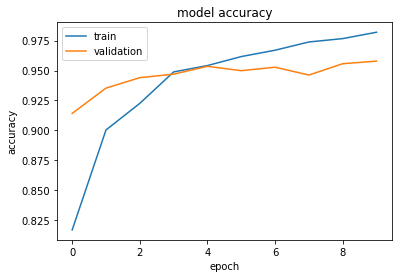

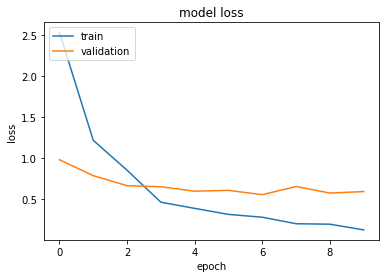

In [6]:
# Model evaluation
scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(validation_generator,verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))
#For plotting Accuracy and Loss
#def LearningCurve(history):
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#LearningCurve(history)
#Save the trained model to a file 
model_weight_file='/home/adesoji/hh/Curacel_model&weights/Badd_Good_cars.h5'

model.save(model_weight_file)

In [7]:
model.save('/home/adesoji/hh/Curacel_model&weights/hot_model.h5')

In [8]:
model.save('curacel_model.hdf5')

In [8]:
target_size =(224,224)

This image is 100.00 percent Bad_car and 0.00 percent Good_car.


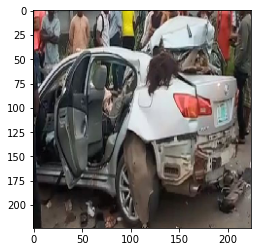

In [11]:
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/_119337730_ntaroadaccidentaccidentforportharcourtleadtodeathfivefortrafficcollision.jpeg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)




This image is 0.00 percent Bad_car and 100.00 percent Good_car.


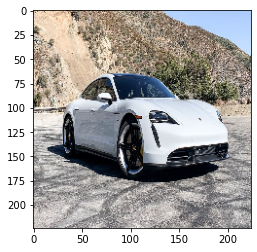

In [10]:
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/1000x-1.jpg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)

This image is 100.00 percent Bad_car and 0.00 percent Good_car.


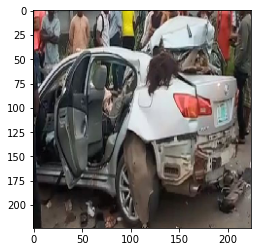

In [17]:
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/_119337730_ntaroadaccidentaccidentforportharcourtleadtodeathfivefortrafficcollision.jpeg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)

This image is 99.97 percent Bad_car and 0.03 percent Good_car.


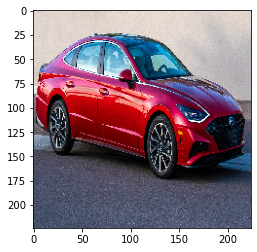

In [18]:
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/SONATA-hero-option1-764A5360-edit.jpg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)

In [ ]:

img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/SONATA-hero-option1-764A5360-edit.jpg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)

This image is 0.00 percent Bad_car and 100.00 percent Good_car.


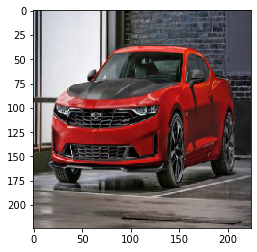

In [19]:
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/chevrolet-camaro-turbo1le-001-1600968858.jpg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)

This image is 0.00 percent Bad_car and 100.00 percent Good_car.


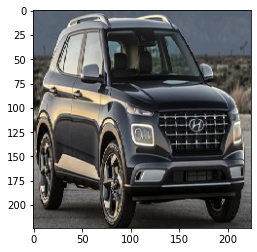

In [12]:
#for making prediction from local machine directory
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/606932.jpg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)


In [3]:
#loading the model back
from tensorflow import keras
model = keras.models.load_model('/home/adesoji/hh/Curacel_model&weights/hot_model.h5')

In [11]:
#Embedding the link used for test
from IPython.display import Image
![image of car](https://www.istockphoto.com/photo/front-of-light-gray-color-car-with-pick-up-have-big-damaged-and-broken-by-accident-gm1161060936-318016651.png)


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[image of car](https://www.istockphoto.com/photo/front-of-light-gray-color-car-with-pick-up-have-big-damaged-and-broken-by-accident-gm1161060936-318016651.png)'


This image is 100.00 percent Bad_car and 0.00 percent Good_car.


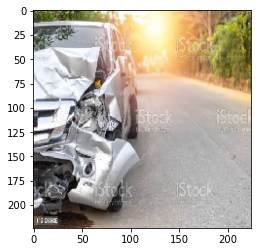

In [5]:
#The embedded image passed in for testing
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

target_size =(224,224)
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/istockphoto-1161060936-612x612.jpg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)

#second embedded image for testing below

In [ ]:
![image of second  emdedded car](https://www.istockphoto.com/photo/traffic-mishap-gm523830845-52015598?utm_source=unsplash&utm_medium=affiliate&utm_campaign=srp_photos_top&utm_content=https%3A%2F%2Funsplash.com%2Fs%2Fphotos%2Fcar-accident&utm_term=car%20accident%3A%3Asearch-aggressive-affiliates-v1%3Ab)

This image is 100.00 percent Bad_car and 0.00 percent Good_car.


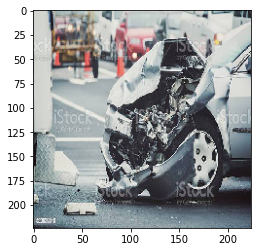

In [6]:
target_size =(224,224)
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/istockphoto-523830845-612x612.jpg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)

In [7]:
![image of Third  emdedded car](https://unsplash.com/photos/2AovfzYV3rc)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[image of Third  emdedded car](https://unsplash.com/photos/2AovfzYV3rc)'


This image is 91.34 percent Bad_car and 8.66 percent Good_car.


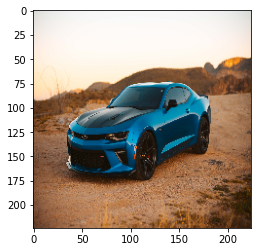

In [8]:
target_size =(224,224)
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/stefan-rodriguez-2AovfzYV3rc-unsplash.jpg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)





In [ ]:
![image of Fourth  emdedded car](https://unsplash.com/photos/Hf1rAKkfMAg

This image is 0.00 percent Bad_car and 100.00 percent Good_car.


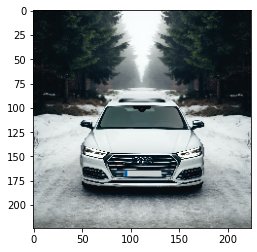

In [10]:
target_size =(224,224)
img = tf.keras.preprocessing.image.load_img('/home/adesoji/Downloads/karl-kohler-Hf1rAKkfMAg-unsplash.jpg',target_size=target_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Bad_car and %.2f percent Good_car."
    % (100 * (1 - score), 100 * score)
)
plt.imshow(img)



In [ ]:
#Continuous improvement by adding of data for future reference is needed and making  continuous inference to validate the model. The present model accuracy is 95%. the model is available on github repository

#The End

#END of Binary classification of Bad Vs Good cars

#Next is Deployment